In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots properly
%matplotlib inline


In [2]:
df=pd.read_csv("Dataset.csv")

In [3]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


In [4]:
#Basic dataset Information
df.shape  #returns no.of rows and columns
df.columns  #returns what are the columns present in the dataset
df.info()   #returns the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [5]:
#check missing values
df.isnull().sum() #counts missing values
df['Health_Impacts'] = df['Health_Impacts'].fillna("Unknown") #replacing missing values with Unknown

In [6]:
df.describe(include='object') #Descriptive Statistics

,Gender,Primary_Device,Health_Impacts,Urban_or_Rural
count,9712,9712,9712,9712
unique,2,4,16,2
top,Male,Smartphone,Unknown,Urban
freq,4942,4568,3218,6851


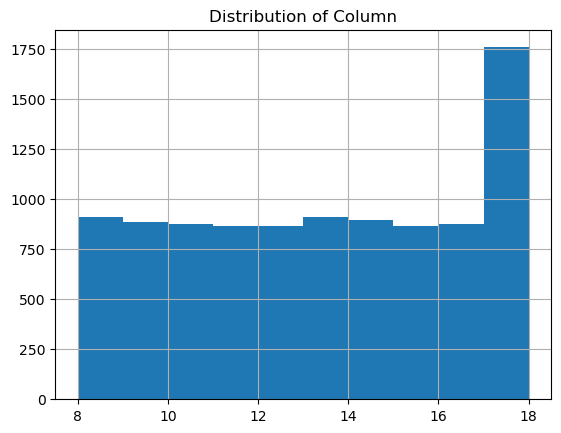

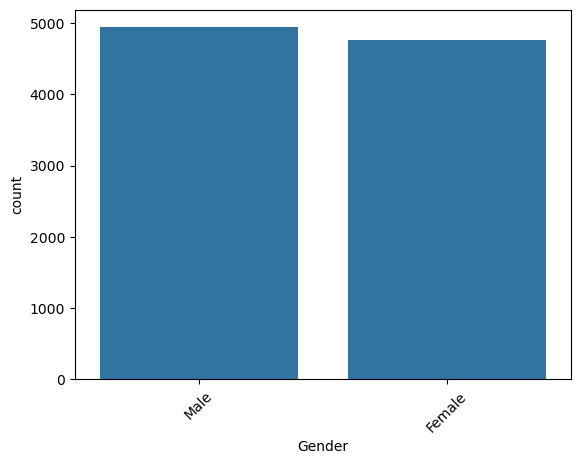

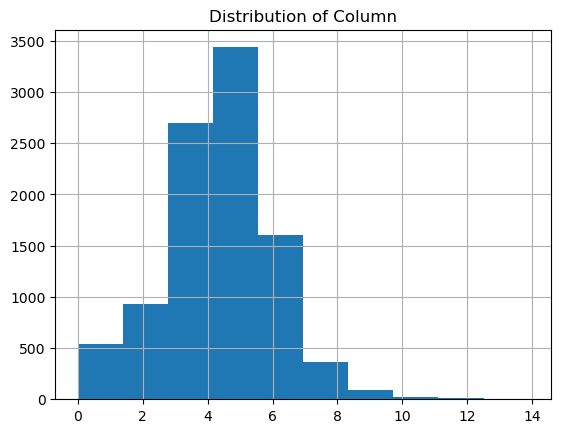

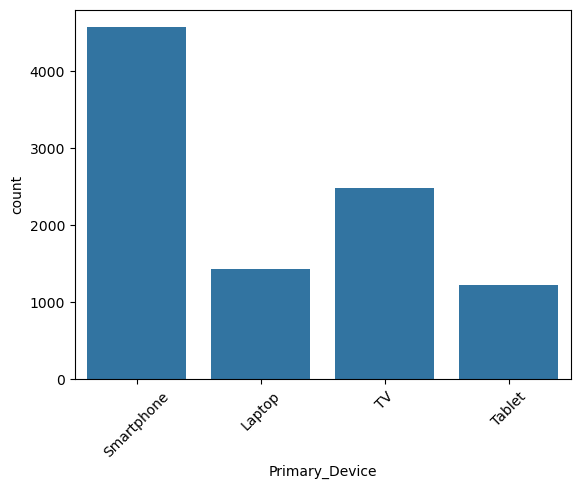

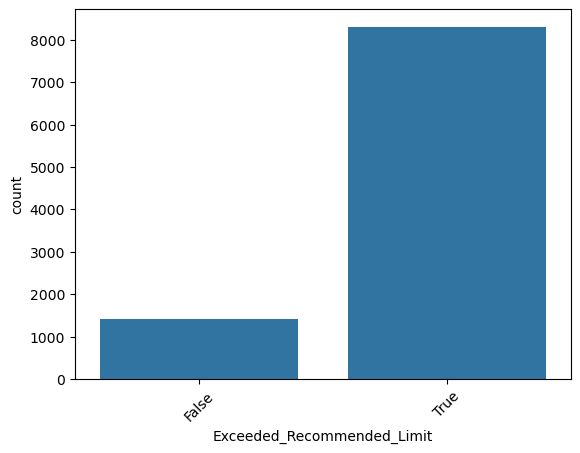

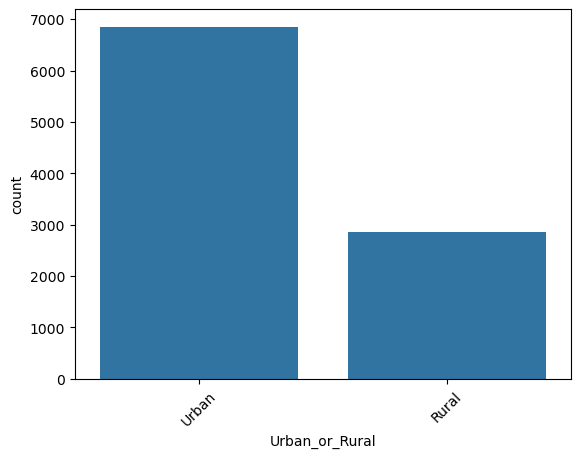

In [7]:
df['Age'].hist()                #Univariate Analysis for numerical data
plt.title("Distribution of Column")
plt.show()


sns.countplot(x='Gender', data=df)  #Univariate Analysis for Categorical data
plt.xticks(rotation=45)
plt.show()

df['Avg_Daily_Screen_Time_hr'].hist()     #Univariate Analysis for numerical data
plt.title("Distribution of Column")
plt.show()

sns.countplot(x='Primary_Device', data=df)  #Univariate Analysis for Categorical data
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Exceeded_Recommended_Limit', data=df)  #Univariate Analysis for Categorical data
plt.xticks(rotation=45)
plt.show()

# df['Educational_to_Recreational_Ratio'].hist()                #Univariate Analysis for numerical data
# plt.title("Distribution of Column")
# plt.show()

# sns.countplot(x='Health_Impacts', data=df)  #Univariate Analysis for Categorical data
# plt.xticks(rotation=45)
# plt.show()

sns.countplot(x='Urban_or_Rural', data=df)  #Univariate Analysis for Categorical data
plt.xticks(rotation=45)
plt.show()

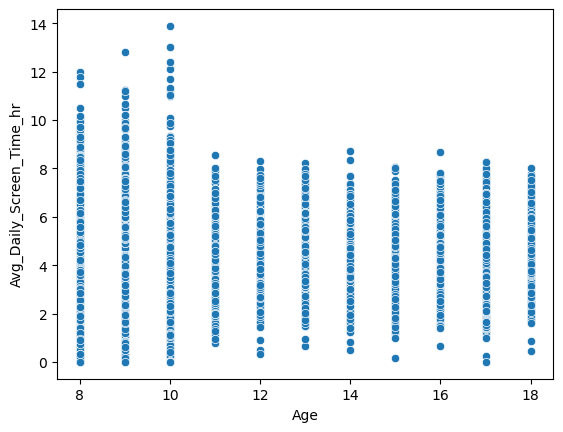

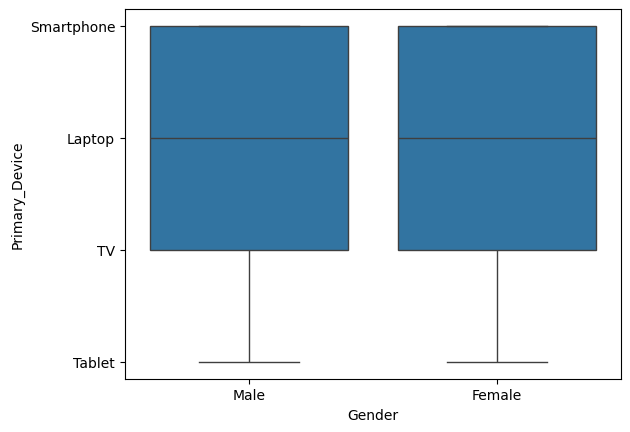

In [8]:
sns.scatterplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df)
plt.show()

sns.boxplot(x='Gender', y='Primary_Device', data=df)
plt.show()


In [9]:
pd.crosstab(df['Gender'], df['Urban_or_Rural'])   #Bivariate Analysis

Urban_or_Rural,Rural,Urban
Gender,,
Female,1410,3360
Male,1451,3491


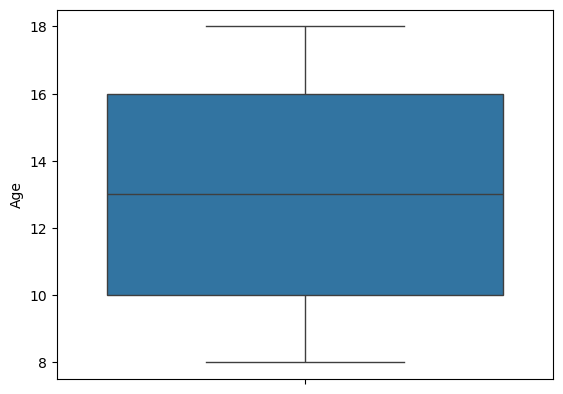

In [10]:
sns.boxplot(df['Age'])  #Outliers check
plt.show()
